In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.losses import *
import skimage.io as io
import skimage.transform as tr
import skimage.color
import dask.array as da
from glob import glob
from dask.array.image import imread
from skimage import img_as_ubyte

Using TensorFlow backend.


In [2]:
def read_img(path, size):
    img = io.imread(path)
    img = tr.resize(img, size)
    img_as_ubyte(img)
    return img

def read_imgs(path, size):
    imgs = []
    paths = glob(path)
    index = 0
    for p in paths:
        img = read_img(p, size)
        imgs.append(img)
        index += 1
        if (index % 200 == 0):
            print(index)
    return np.array(imgs)


# Reads the images from a path, iterating over all images
# - resizing them to a 1 channel grayscale image
# - saving all images in a numpy array, returns this array 
def read_masks(path, size):
    imgs = []
    paths = glob(path)
    index = 0
    for p in paths:
        
        mask1 = read_img(p, (224,224,1))
        mask1 = np.array(mask1)
        mask1[mask1[:,:,0] > 0.001] = 1
        #mask1[mask1 > 0.01] = 1
        
        p2 = p.replace("masks_01","masks_02")
        mask2 = read_img(p2, (224,224,1))
        mask2 = np.array(mask2)
        mask2[mask2[:,:,0] > 0.001] = 1
        
        
        #black = np.zeros((224,224,1))
        #black[black[:,:,0] == 0] = 1
        #black[(mask1[:,:,0] == 1)|(mask2[:,:,0] == 1)] = 0
        
        
        if (index == 4):
            arr1 = np.zeros((224,224,1))
            arr2 = np.zeros((224,224,1))
            neu = np.zeros((224,224,1))
            
            neu = np.concatenate([arr1,arr2,mask2], axis=2)
            io.imsave('teeeeest.png',neu)
            print('Done')
        

        #p3 = p.replace("masks_03","masks_02")
        #print(p3)
        #mask3 = read_img(p3, (224,224,1))
        
        masks = np.concatenate([mask1, mask2], axis=2)
        
        imgs.append(masks)
        index += 1
        if (index % 200 == 0):
            print(index)
    return np.array(imgs)

# Saves the data into a variable (x = input, y = masks / ground truth)
x = None
x = read_imgs('/home/dan/Desktop/combined_masks/images/data/*.png', (224,224,1))
y = None
y = read_masks('/home/dan/Desktop/combined_masks/masks_01/data/*.png', (224,224,1))

/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000


/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: teeeeest.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Done
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000


In [3]:
mask_train = tf.keras.utils.to_categorical(y,2)

In [90]:
print(y.shape)
print(y.shape[0])

test = y.reshape(y.shape[0],-1,y.shape[3])
print(test.shape)

u = test.reshape((3064,224,224,2))


(3064, 224, 224, 2)
3064
(3064, 50176, 2)


In [4]:
print (mask_train.shape)

(3064, 224, 224, 2, 2)


In [3]:
def showImage(img, title=None, cmap=None):
    
    if (title != None):
        plt.title(title)
        
    plt.imshow(img[:,:,0], cmap = cmap)
    plt.show()    


def showImageFromArray(arr, i, title=None, cmap=None):
    showImage(arr[i],title,cmap)

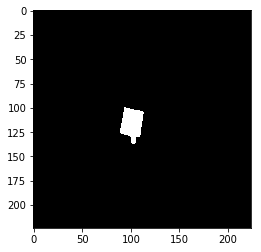

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


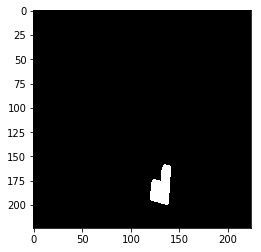

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


IndexError: index 2 is out of bounds for axis 2 with size 2

In [4]:
# Plots the images in jupyter notebook for comparison
#y = y/255
#showImage(x[600], cmap='gray')

plt.imshow(y[4][:,:,0], cmap = 'gray')
plt.show()
print(np.amax(y[4][:,:,0], axis=1))

plt.imshow(y[4][:,:,1], cmap = 'gray')
plt.show()

print(np.amax(y[4][:,:,1], axis=1))

plt.imshow(y[4][:,:,2], cmap = 'gray')
plt.show()

In [5]:
print(y.shape)

(3064, 224, 224, 2)


In [5]:
# Defining the loss function 
def iou(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1. - intersection)

def iou_loss(y_true, y_pred):
    return  -iou(y_true, y_pred)

def f1(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1.) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.)

def f1_np(y_true, y_pred):
    return (2. * (y_true * y_pred).sum() + 1.) / (y_true.sum() + y_pred.sum() + 1.)

def f1_loss(y_true, y_pred):
    return 1-f1(y_true, y_pred)

#Altes Modell laden
from keras.models import load_model
model = load_model('modelsave2.h5', custom_objects={'iou_loss': iou_loss})

model.summary()

In [6]:
# Defining the model 
def get_unet(shape=(224,224,1), num_classes = 2):
    inputs = Input(shape)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=3)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=3)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=3)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=3)
    conv9 = Conv2D(16, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv9)

    #num_classes = Anzahl der Ausgabebilder
    final_conv_out = Conv2D(num_classes, (1, 1))(conv9)
    
    #x = Reshape((num_classes, 224*224))(final_conv_out)
    #x = Permute((2,1))(x)
    
    seg = Activation("softmax")(final_conv_out)
    print(seg.shape)

    model = Model(inputs=inputs, outputs=seg)

    return model

model = None
model = get_unet()
model.summary()

(?, 224, 224, 2)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 16) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

from unet import UNet
model = None
model = UNet((224,224,1), 2, 16, 4, 2.0)
model.summary()

In [7]:
model.compile(optimizer=Adam(lr=0.001), loss=f1_loss, metrics=['accuracy'])

In [8]:
train = 2450 # = 80% of all given data  
model.fit(x[:train], y[:train], batch_size=32, epochs=15,
         validation_data=(x[train:], y[train:]), shuffle=True)

Train on 2450 samples, validate on 614 samples
Epoch 1/15
2450/2450 [==============================] - 25s 10ms/step - loss: 0.9795 - acc: 0.9797 - val_loss: 0.9791 - val_acc: 0.9891
Epoch 2/15
2450/2450 [==============================] - 19s 8ms/step - loss: 0.9793 - acc: 0.9898 - val_loss: 0.9791 - val_acc: 0.9891
Epoch 3/15
2450/2450 [==============================] - 19s 8ms/step - loss: 0.9793 - acc: 0.9898 - val_loss: 0.9791 - val_acc: 0.9891
Epoch 4/15
2450/2450 [==============================] - 19s 8ms/step - loss: 0.9793 - acc: 0.9898 - val_loss: 0.9791 - val_acc: 0.9891
Epoch 5/15
2450/2450 [==============================] - 19s 8ms/step - loss: 0.9793 - acc: 0.9898 - val_loss: 0.9791 - val_acc: 0.9891
Epoch 6/15
2450/2450 [==============================] - 19s 8ms/step - loss: 0.9793 - acc: 0.9898 - val_loss: 0.9791 - val_acc: 0.9891
Epoch 7/15
2450/2450 [==============================] - 19s 8ms/step - loss: 0.9793 - acc: 0.9898 - val_loss: 0.9791 - val_acc: 0.9891
Epoch 8

In [ ]:
z = read_imgs('/home/dan/Desktop/Datenset_TowerBuilding/test/images/data/*.png', (224,224,1))
k = read_imgs('/home/dan/Desktop/Datenset_TowerBuilding/test/masks/data/*.png', (224,224,1))

In [9]:
# makes a prediction for the whole dataset
pred = model.predict(z, verbose=1)

3064/3064 [==============================] - 8s 3ms/step


In [10]:
print(pred.shape)

(3064, 224, 224, 2)


NameError: name 'testPred' is not defined

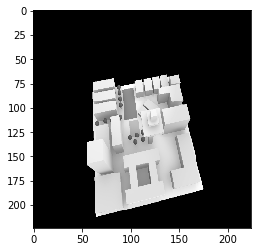

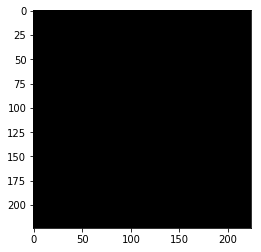

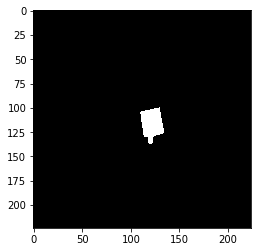

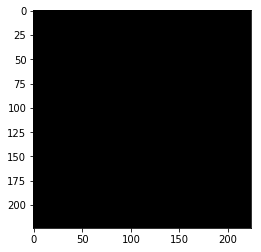

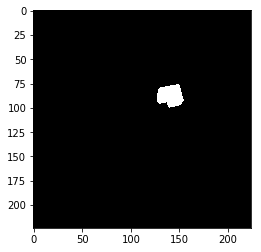

IndexError: index 2 is out of bounds for axis 2 with size 2

In [11]:
# Plots the prediction in jupyter notebook for comparison
i = 420

# Input Picture
plt.imshow(z[i, ..., 0], cmap='gray')
plt.show()

# Ground Truth
plt.imshow(k[i][:,:,0], cmap = 'gray')
plt.show()

# RGB Bild
rg = np.concatenate([pred[i], np.zeros((224,224,1))], axis=2)
plt.imshow(rg)
plt.show()

# Prediction Dim 0
plt.imshow(pred[i][:,:,0], cmap = 'gray')
plt.show()

# Prediction Dim 1
plt.imshow(pred[i][:,:,1], cmap = 'gray')
plt.show()



#plt.imshow(pred[i][:,:,2], cmap = 'gray')
#plt.show()

#plt.imshow(k[i][:,:,2], cmap = 'gray')
#plt.show()

#plt.imshow(y[i, ..., 0], cmap='gray')
#plt.show()
#plt.imshow(pred[i, ..., 0], cmap='gray')
#plt.show()

In [89]:
l = pred[55]
m = np.zeros((224,224,1))
arr = np.concatenate([l,m], axis=2)
io.imsave("teeest.png",arr)

/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


# Save the Model
Speichert
* die Architektur
* die Gewichte
* die Trainingskonfigurationen (loss, optimizer)
* State des Optimizers

In [14]:
model.save('ds1_1_small.h5')